In [3]:
import numpy as np
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data, meta = arff.loadarff('dataSet.arff')
df = pd.DataFrame(data)
for column in df.columns:
    df[column] = df[column].str.decode('utf-8')

In [41]:
df.head()

having_IP_Address URL_Length Shortining_Service having_At_Symbol  \
0                -1          1                  1                1   
1                 1          1                  1                1   
2                 1          0                  1                1   
3                 1          0                  1                1   
4                 1          0                 -1                1   

  double_slash_redirecting Prefix_Suffix having_Sub_Domain SSLfinal_State  \
0                       -1            -1                -1             -1   
1                        1            -1                 0              1   
2                        1            -1                -1             -1   
3                        1            -1                -1             -1   
4                        1            -1                 1              1   

  Domain_registeration_length Favicon  ... popUpWidnow Iframe age_of_domain  \
0                          -1       1  ...           1      1            -1   
1                          -1       1  ...           1      1            -1   
2                          -1       1  ...           1      1             1   
3                           1       1  ...           1      1            -1   
4                          -1       1  ...          -1      1            -1   

  DNSRecord web_traffic Page_Rank Google_Index Links_pointing_to_page  \
0        -1          -1        -1            1                      1   
1        -1           0        -1            1                      1   
2        -1           1        -1            1                      0   
3        -1           1        -1            1                     -1   
4        -1           0        -1            1                      1   

  Statistical_report Result  
0                 -1     -1  
1                  1     -1  
2                 -1     -1  
3                  1     -1  
4                  1      1  

[5 rows x 31 columns]

In [28]:
print("\nData Types and Missing Values:")
print(df.info())

print("\nDistribution of Target Variable (Result):")
print(df['Result'].value_counts())


Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   having_IP_Address            11055 non-null  object
 1   URL_Length                   11055 non-null  object
 2   Shortining_Service           11055 non-null  object
 3   having_At_Symbol             11055 non-null  object
 4   double_slash_redirecting     11055 non-null  object
 5   Prefix_Suffix                11055 non-null  object
 6   having_Sub_Domain            11055 non-null  object
 7   SSLfinal_State               11055 non-null  object
 8   Domain_registeration_length  11055 non-null  object
 9   Favicon                      11055 non-null  object
 10  port                         11055 non-null  object
 11  HTTPS_token                  11055 non-null  object
 12  Request_URL                  11055 non-null  object
 13 

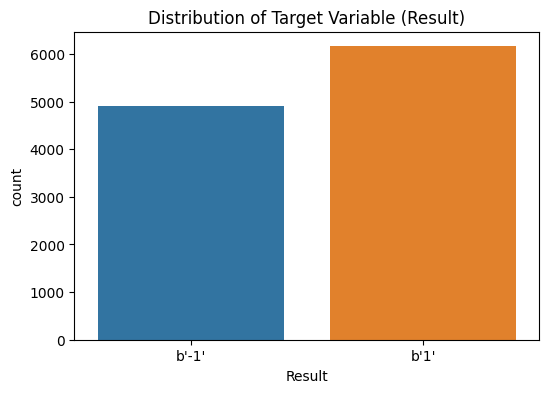

In [29]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Result', data=df)
plt.title('Distribution of Target Variable (Result)')
plt.show()

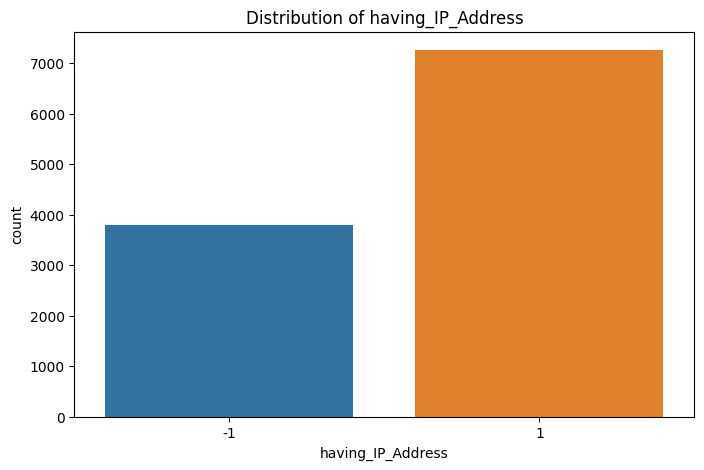

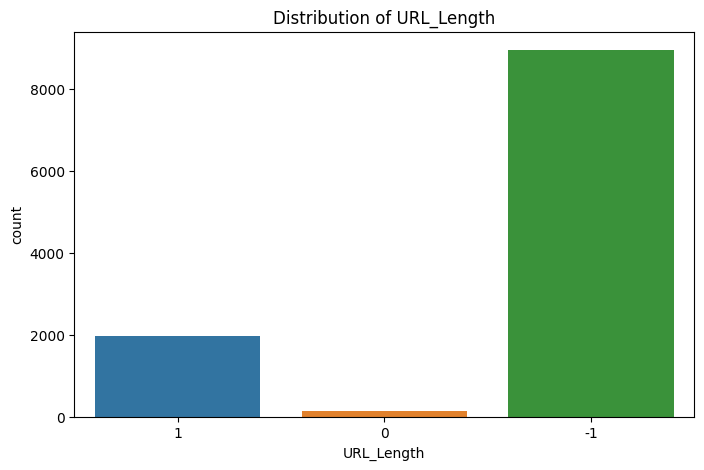

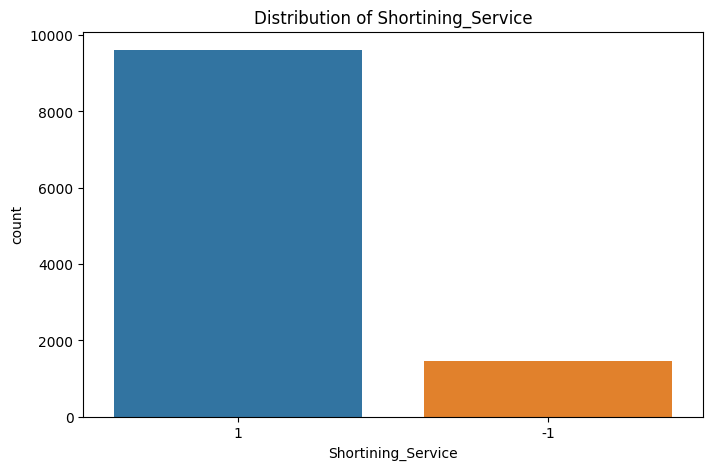

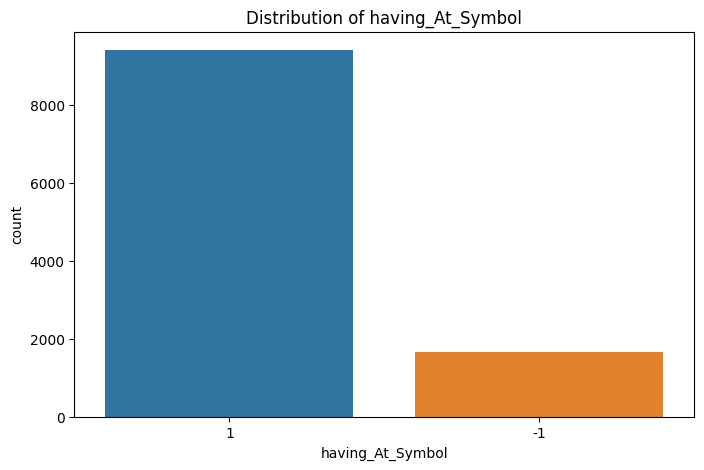

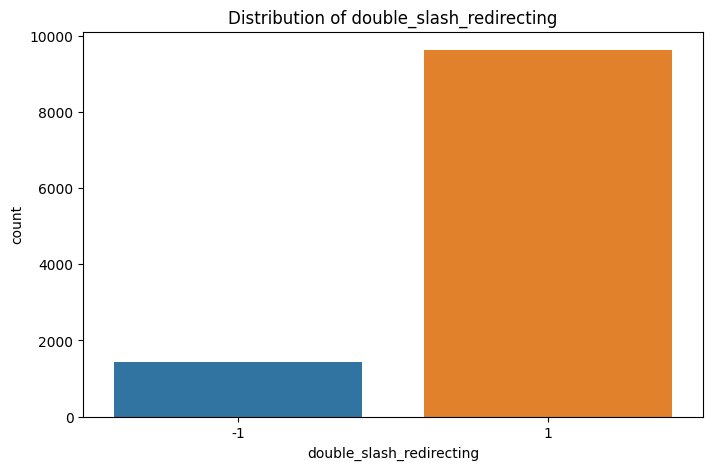

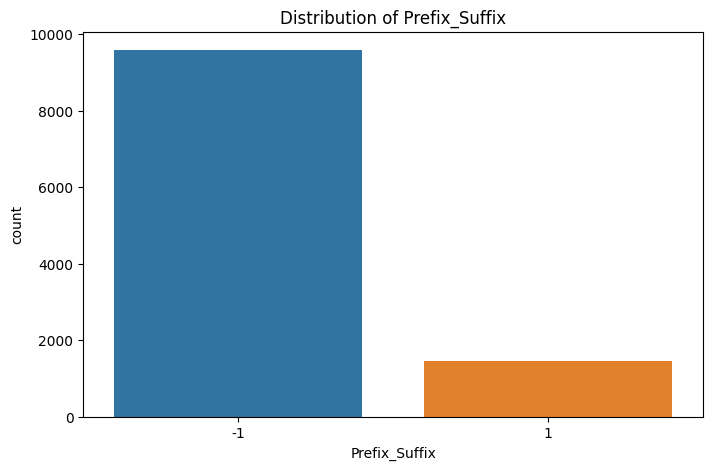

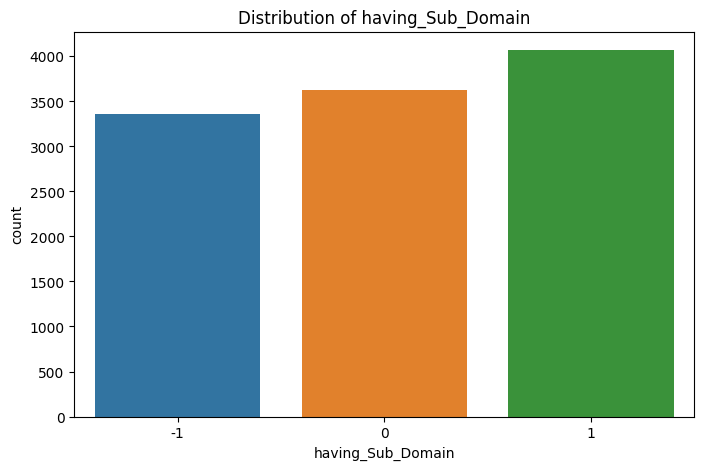

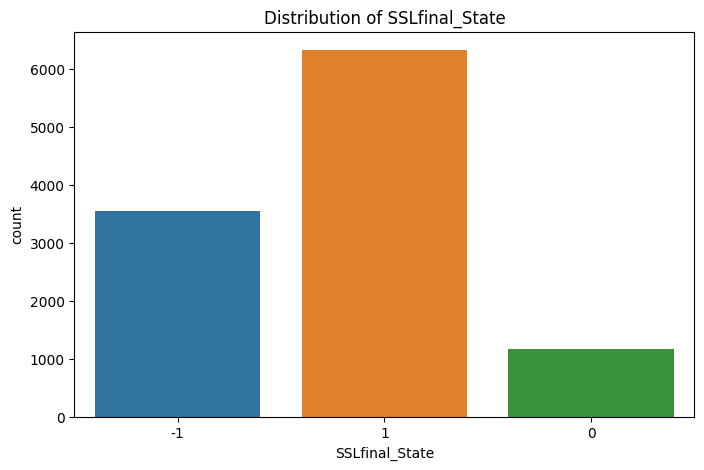

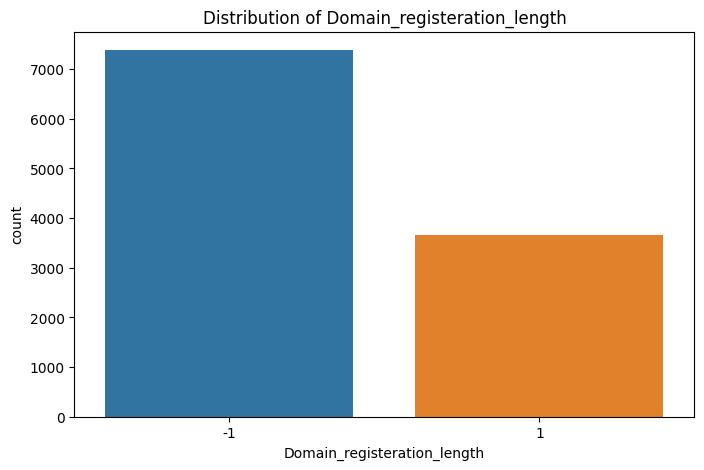

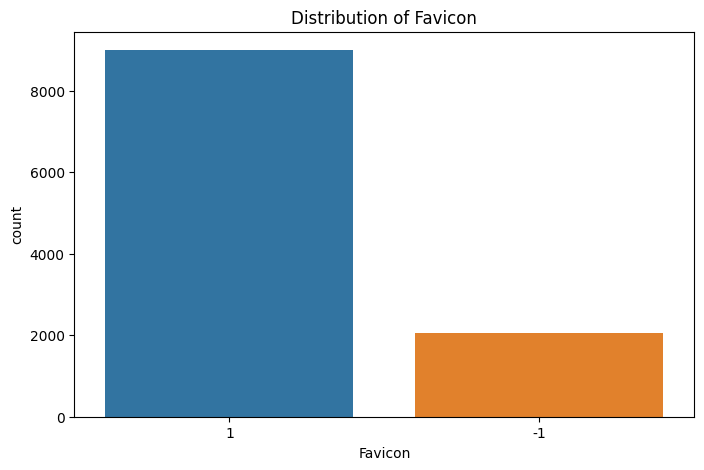

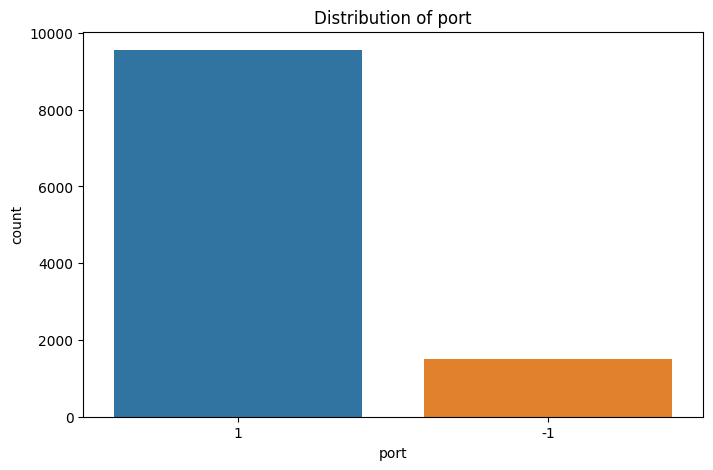

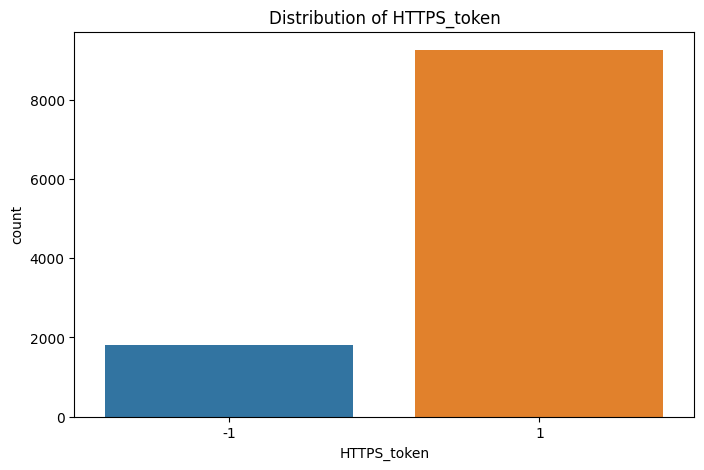

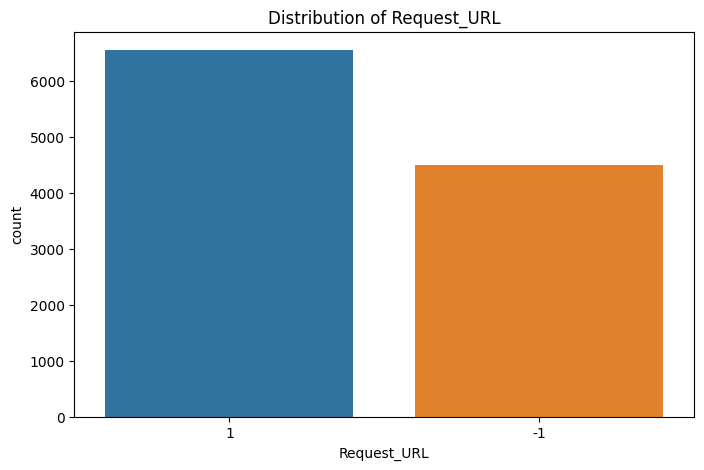

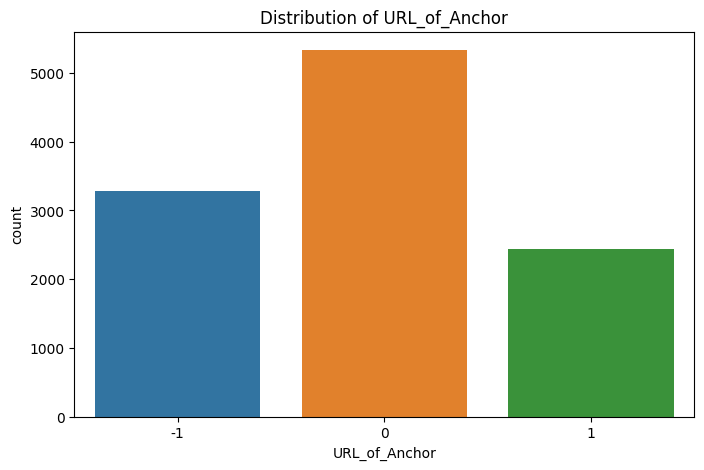

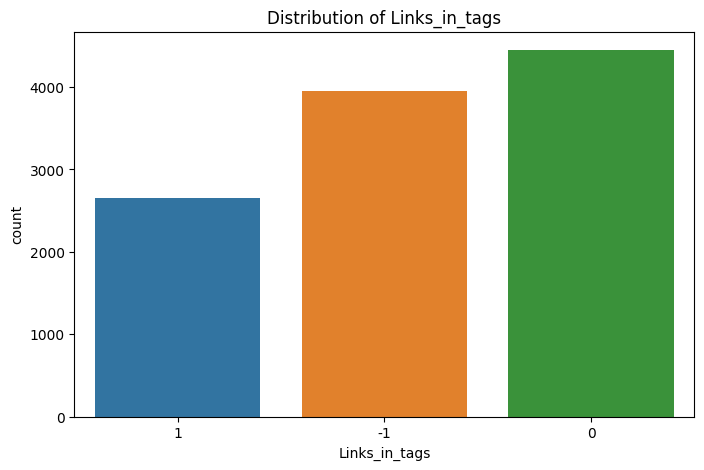

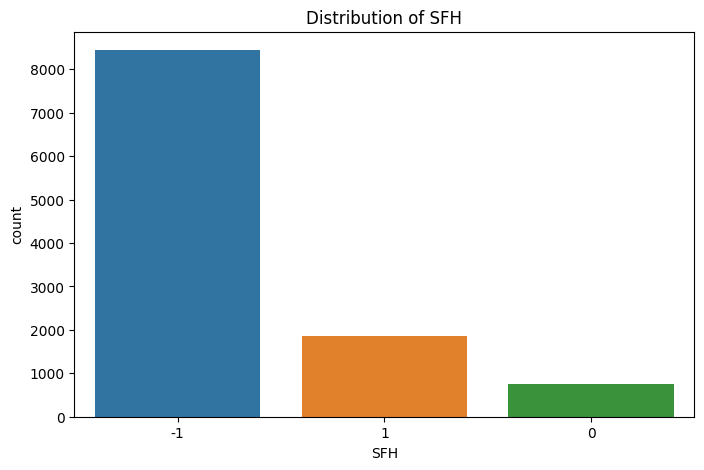

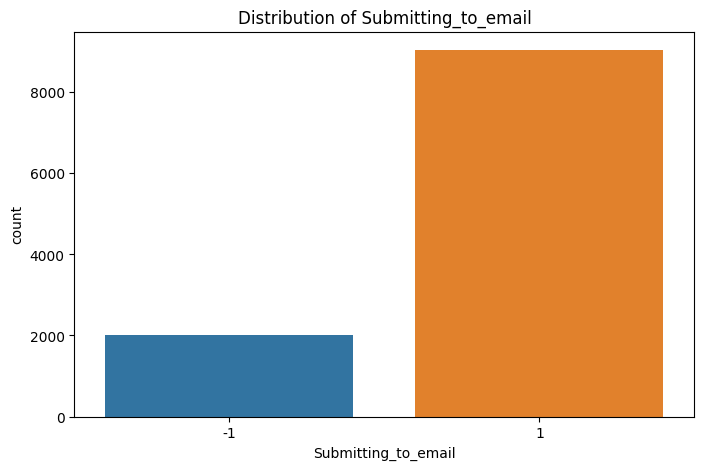

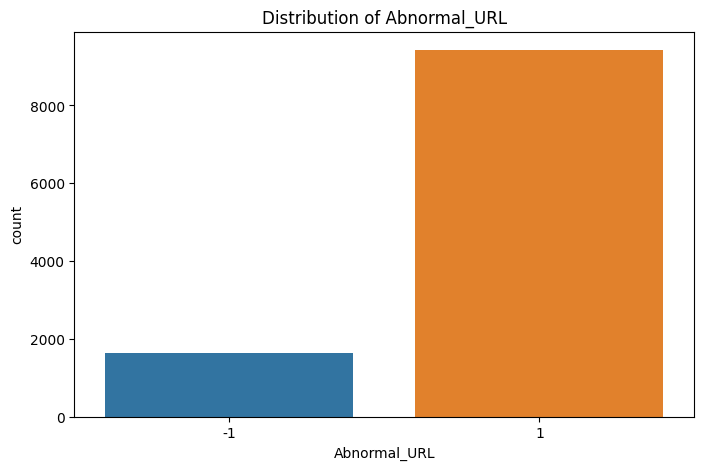

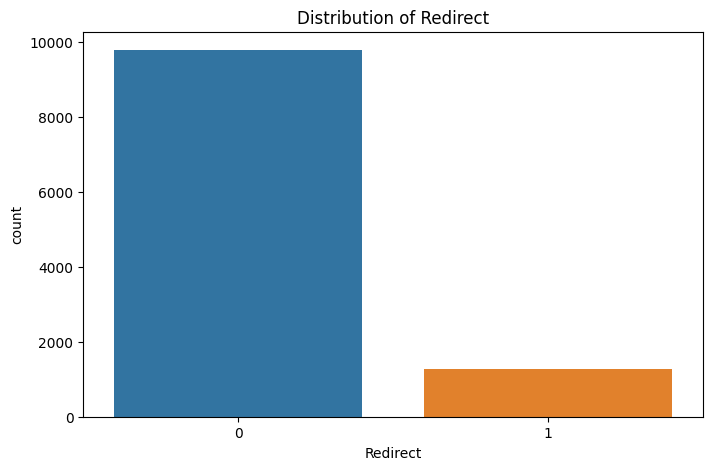

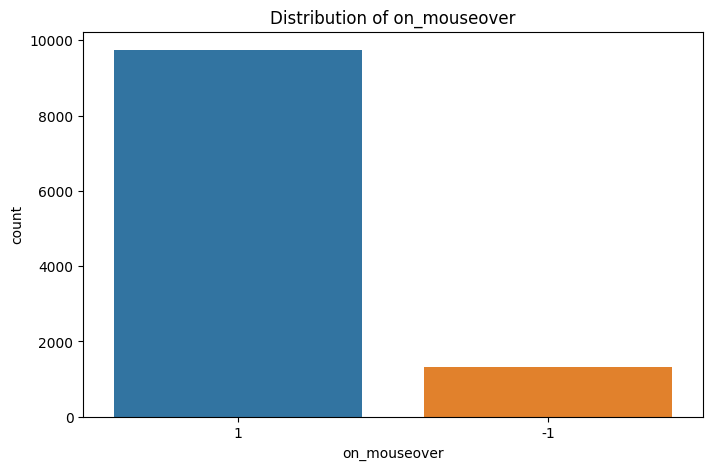

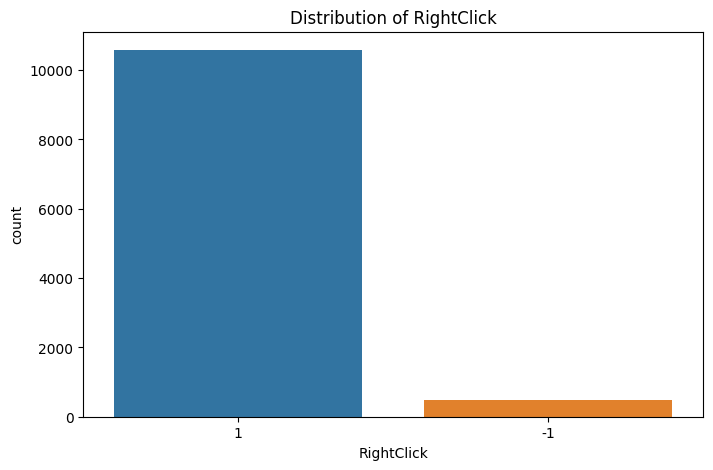

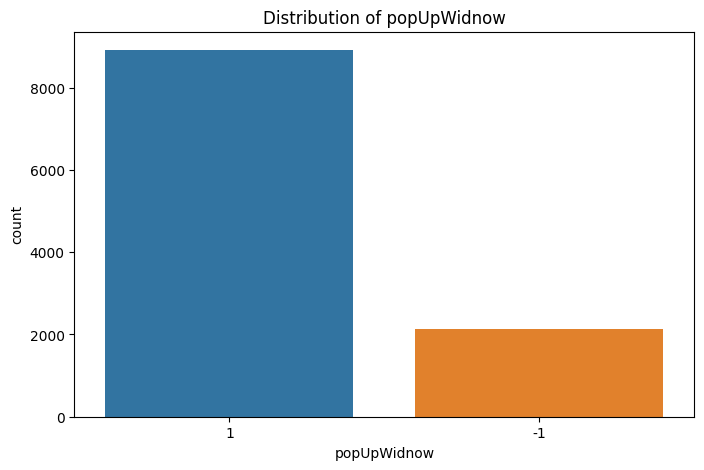

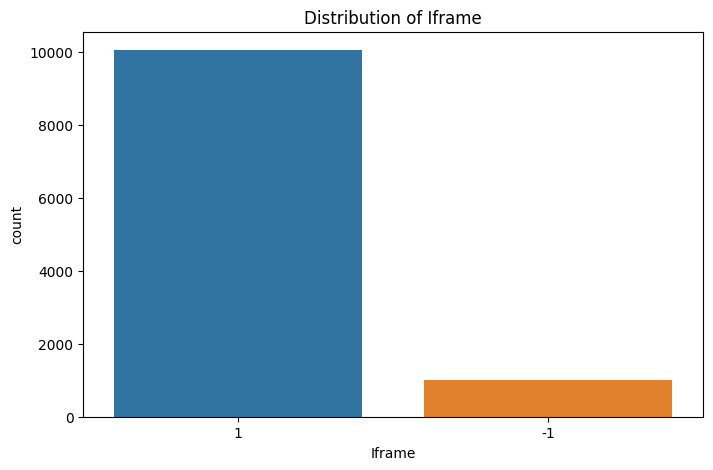

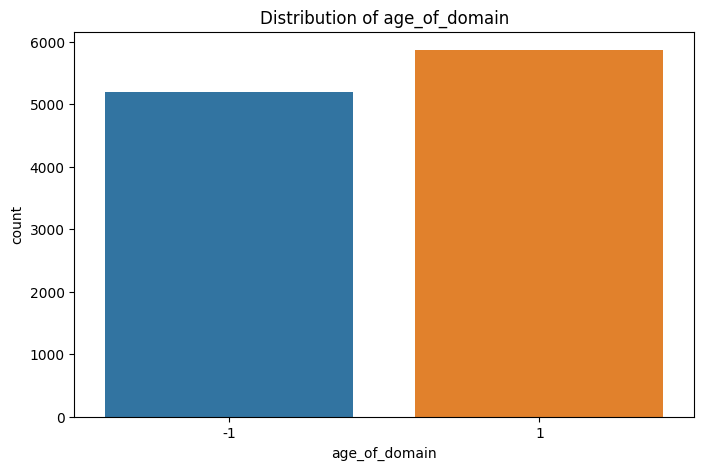

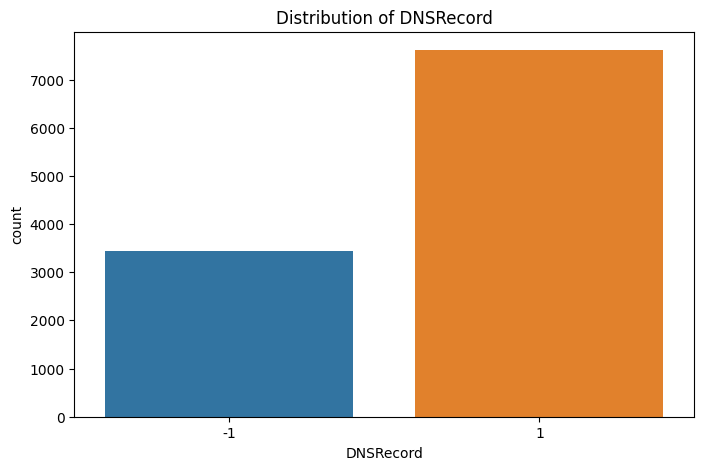

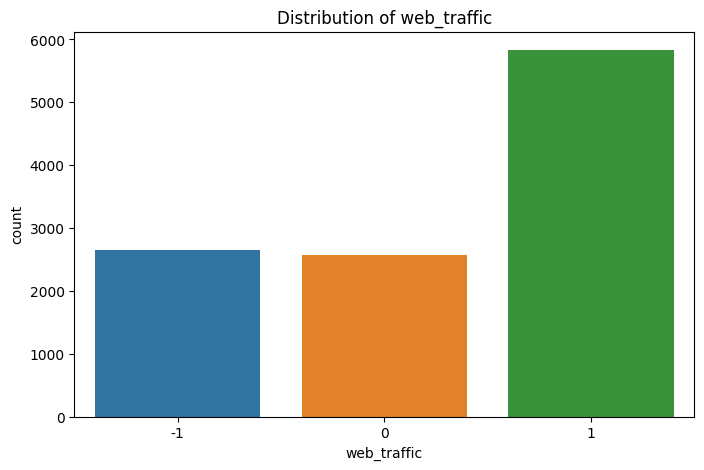

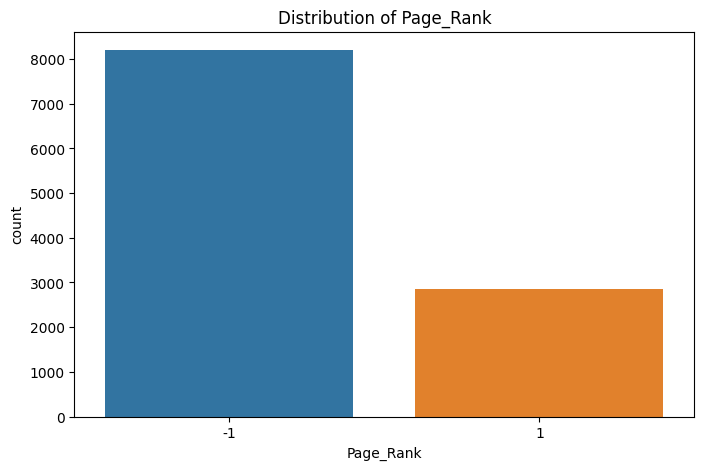

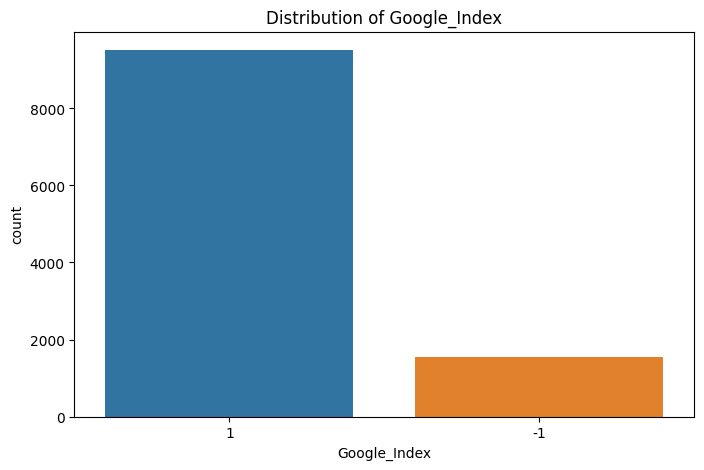

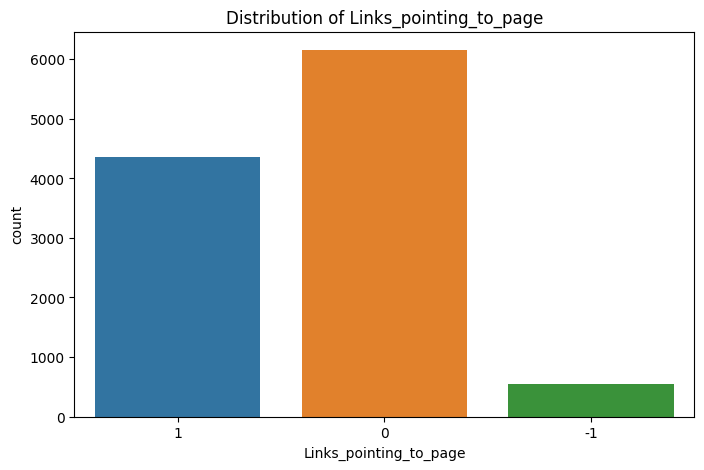

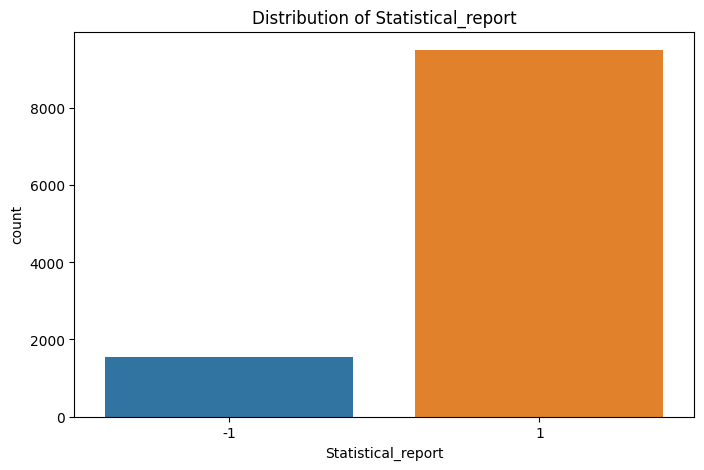

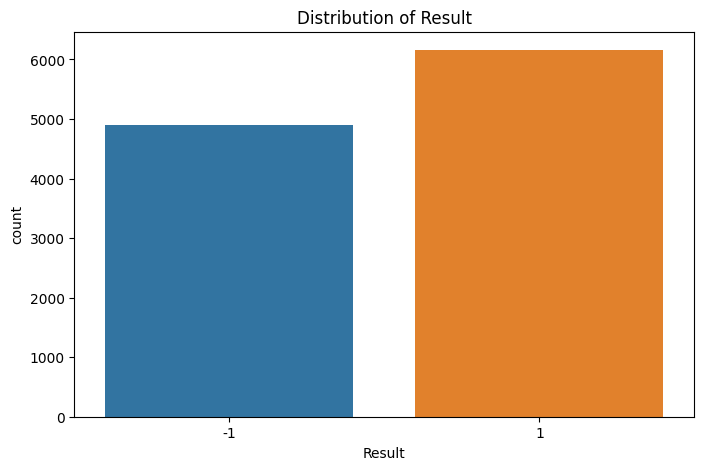

In [46]:
categorical_features = df.select_dtypes(include='object').columns
for column in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()

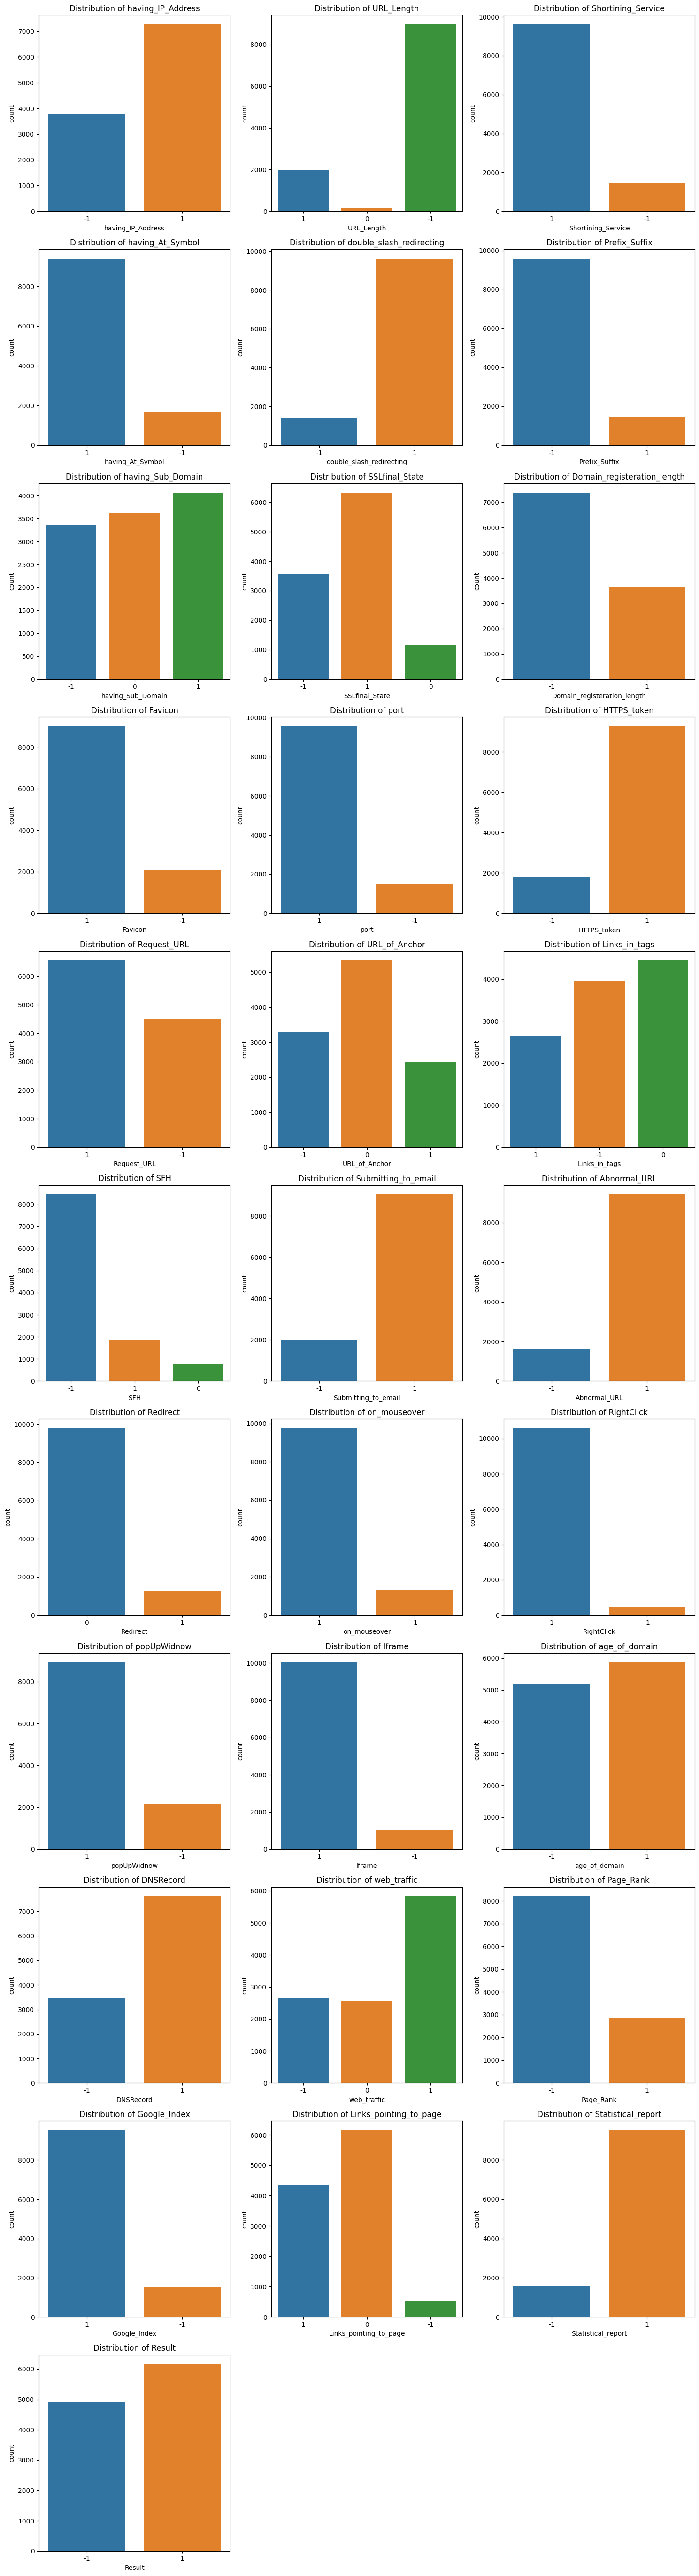

In [47]:
num_features = len(categorical_features)
num_cols = 3  
num_rows = (num_features - 1) // num_cols + 1  

plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(categorical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [50]:
df_int = df.astype(int)
sns.pairplot(df_int, hue='Result', markers=['o', 's'], palette='viridis')
plt.show()

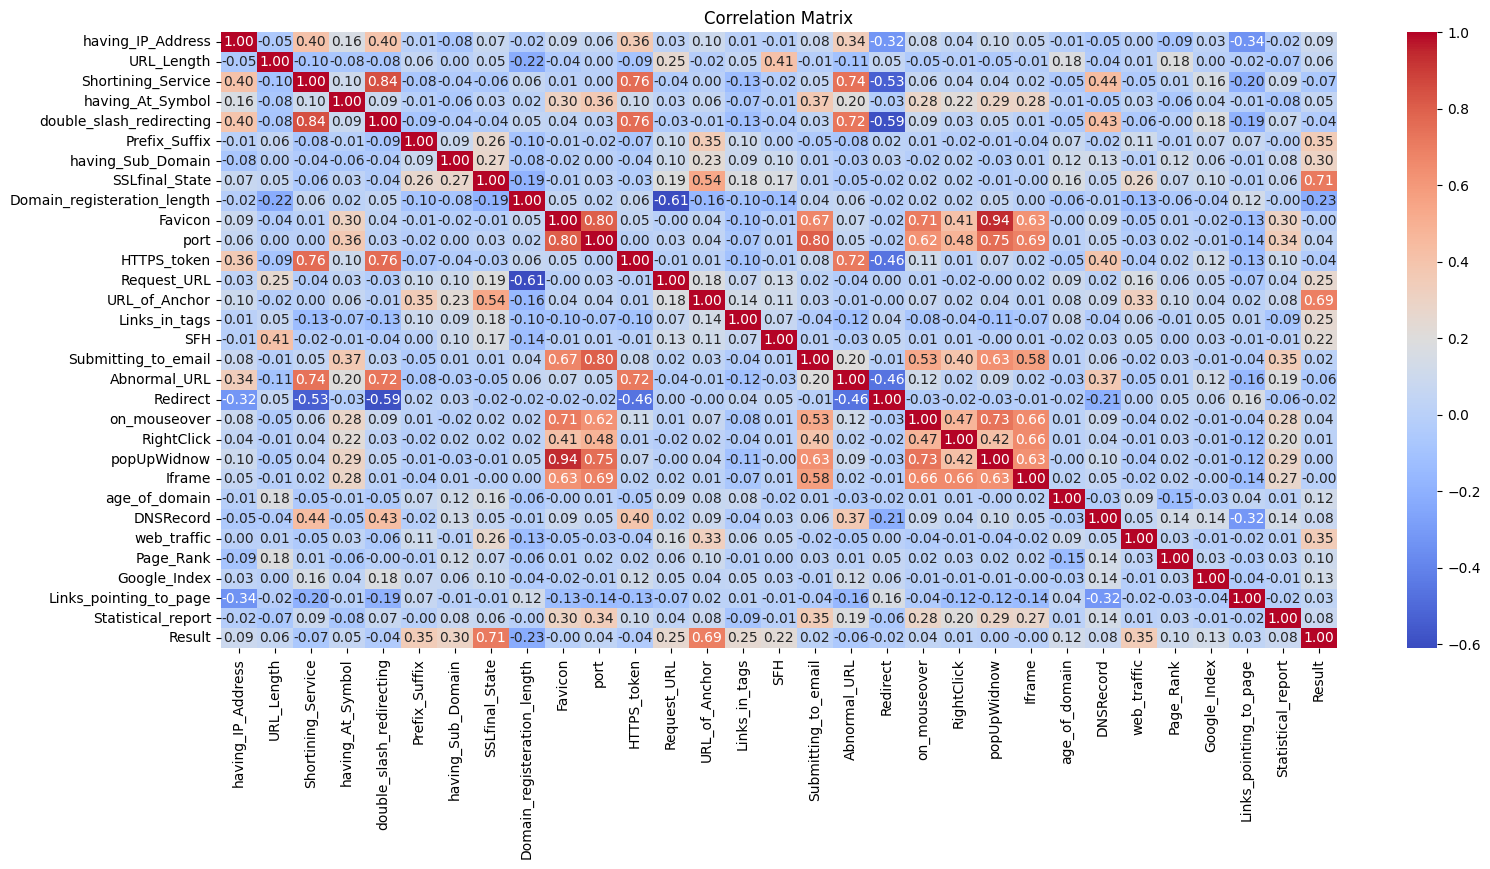

In [64]:
correlation_matrix = df.astype(int).corr()
plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<Figure size 1000x600 with 0 Axes>

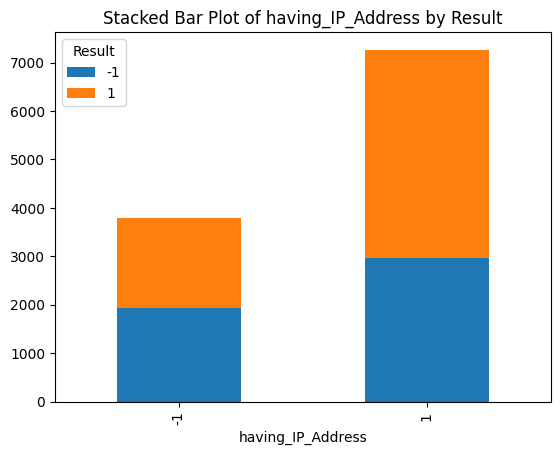

<Figure size 1000x600 with 0 Axes>

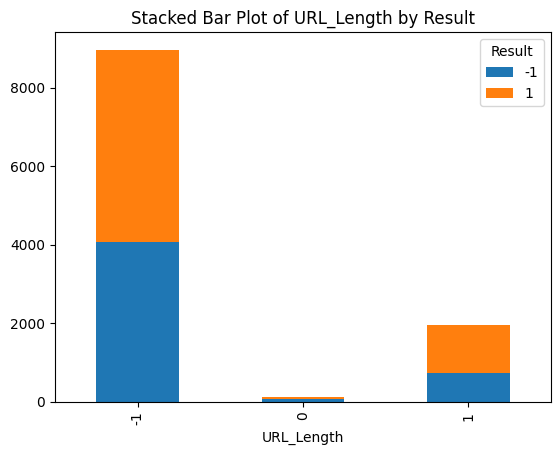

<Figure size 1000x600 with 0 Axes>

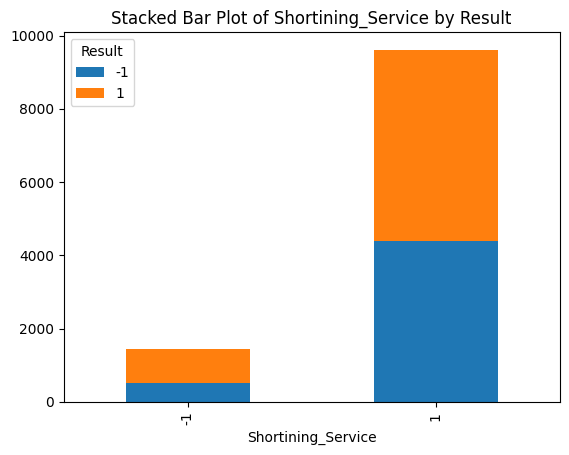

<Figure size 1000x600 with 0 Axes>

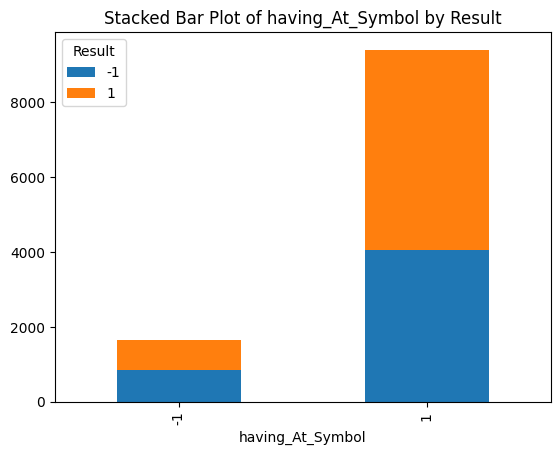

<Figure size 1000x600 with 0 Axes>

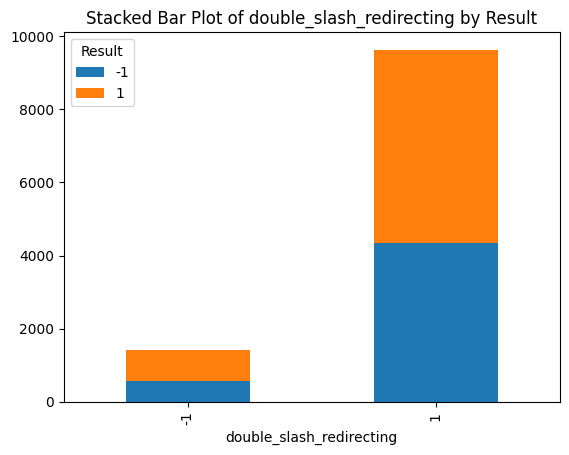

<Figure size 1000x600 with 0 Axes>

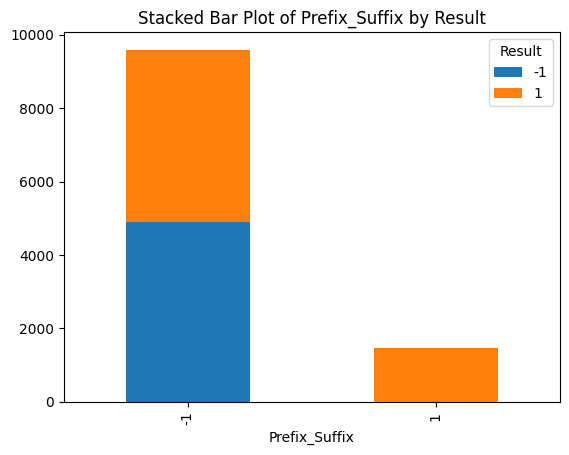

<Figure size 1000x600 with 0 Axes>

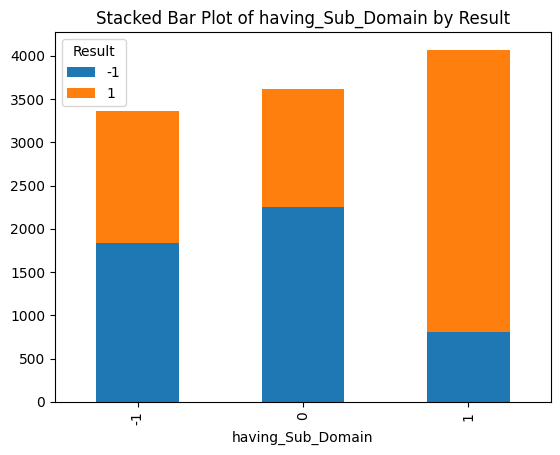

<Figure size 1000x600 with 0 Axes>

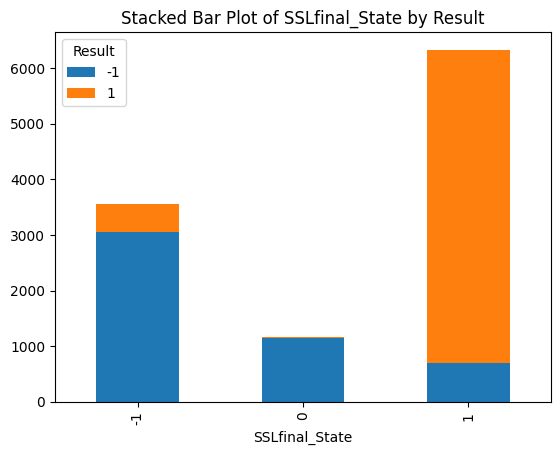

<Figure size 1000x600 with 0 Axes>

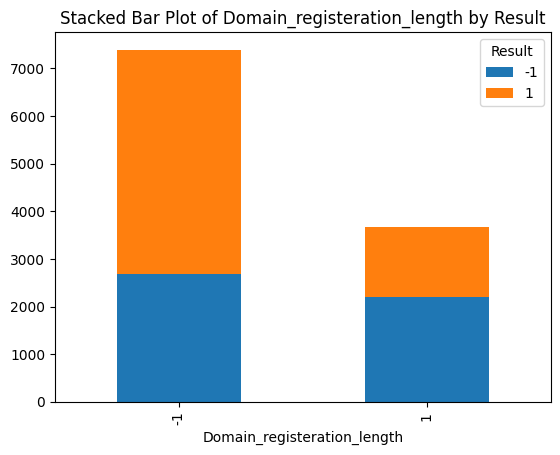

<Figure size 1000x600 with 0 Axes>

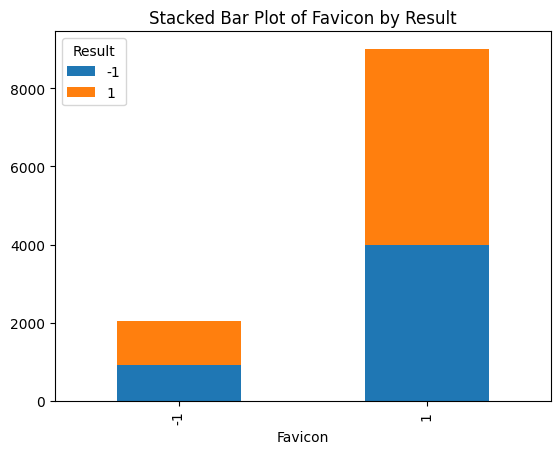

<Figure size 1000x600 with 0 Axes>

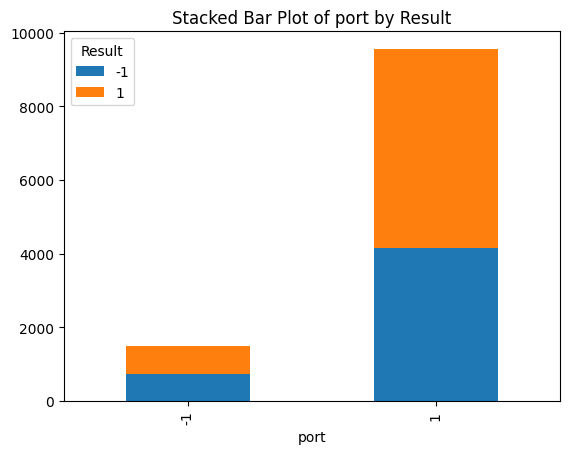

<Figure size 1000x600 with 0 Axes>

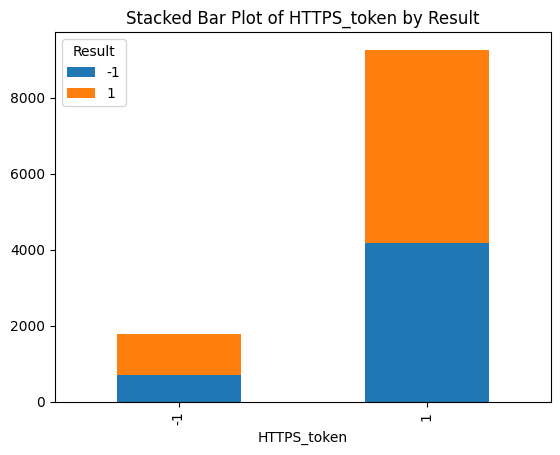

<Figure size 1000x600 with 0 Axes>

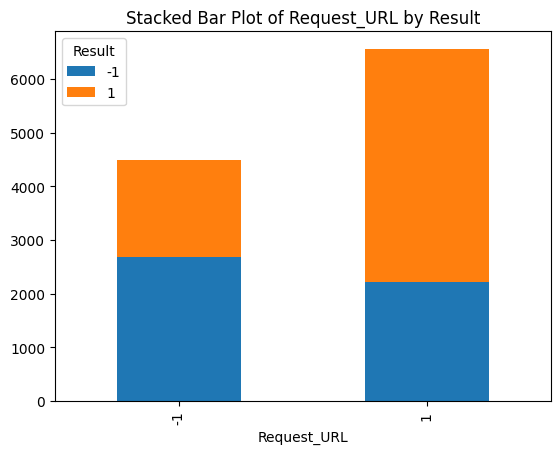

<Figure size 1000x600 with 0 Axes>

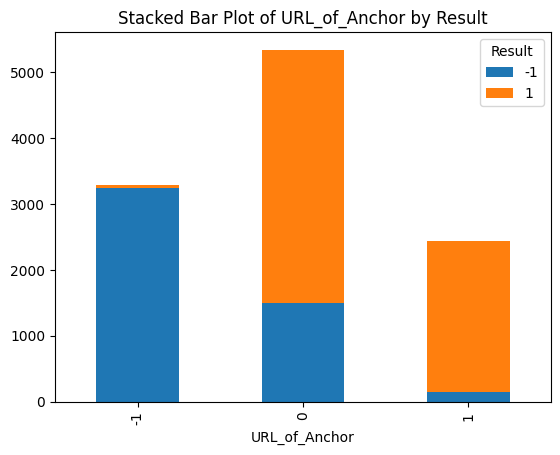

<Figure size 1000x600 with 0 Axes>

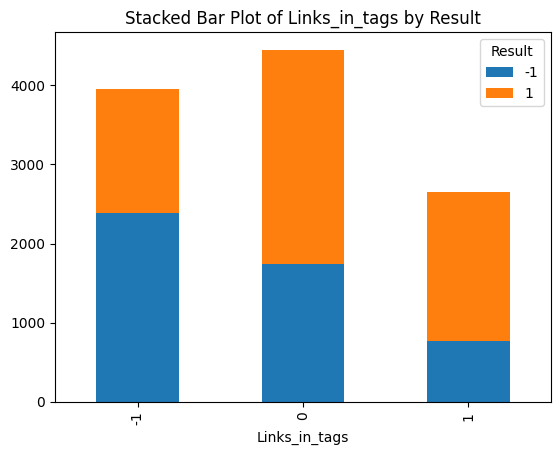

<Figure size 1000x600 with 0 Axes>

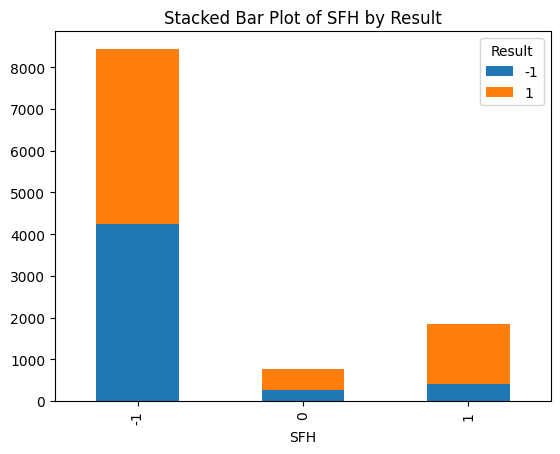

<Figure size 1000x600 with 0 Axes>

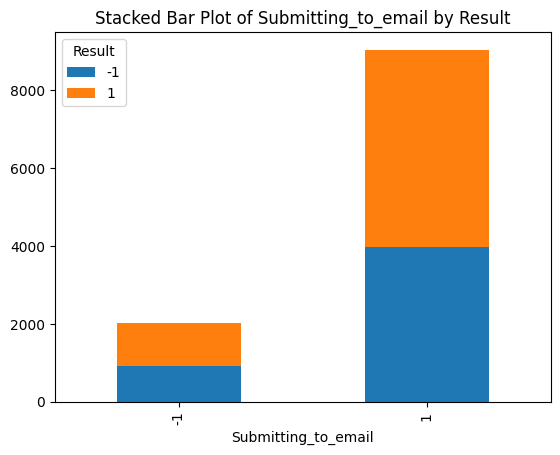

<Figure size 1000x600 with 0 Axes>

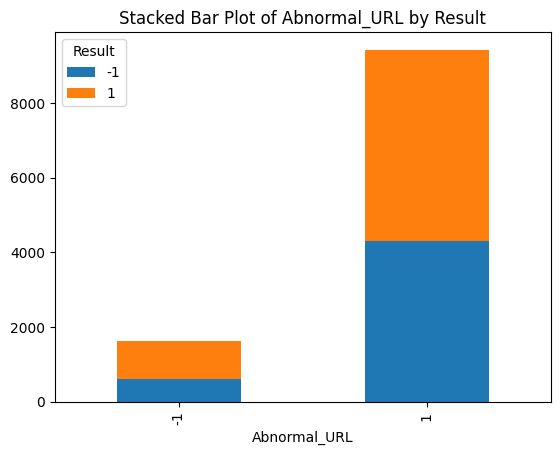

<Figure size 1000x600 with 0 Axes>

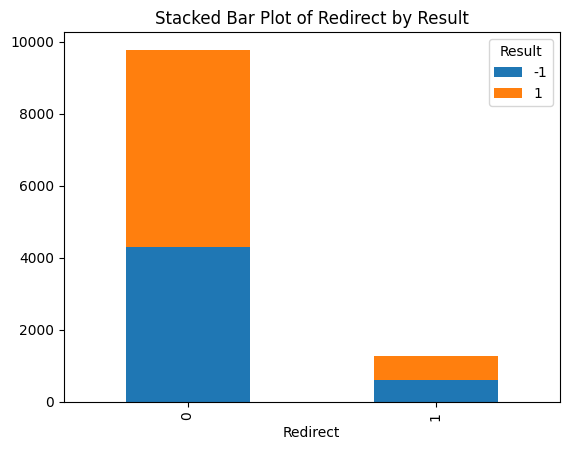

<Figure size 1000x600 with 0 Axes>

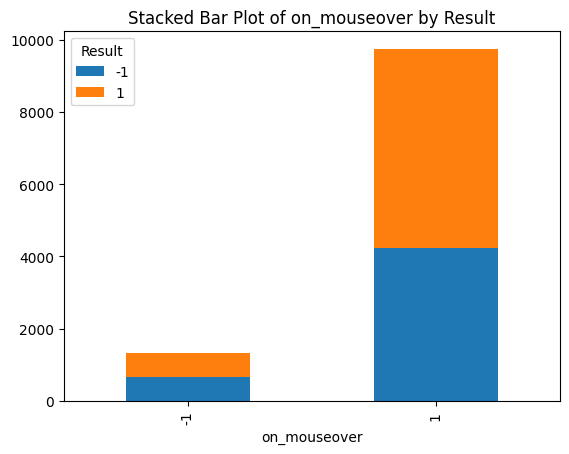

<Figure size 1000x600 with 0 Axes>

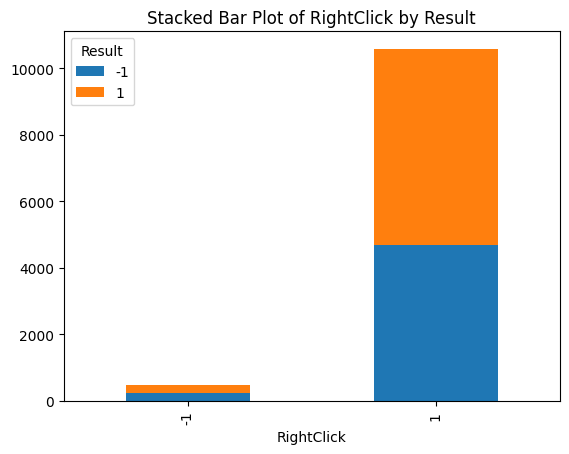

<Figure size 1000x600 with 0 Axes>

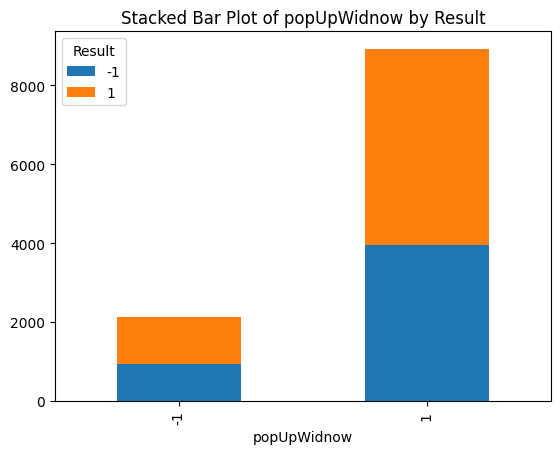

<Figure size 1000x600 with 0 Axes>

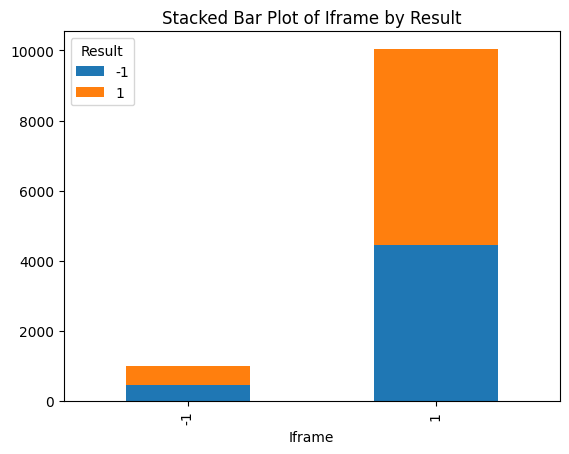

<Figure size 1000x600 with 0 Axes>

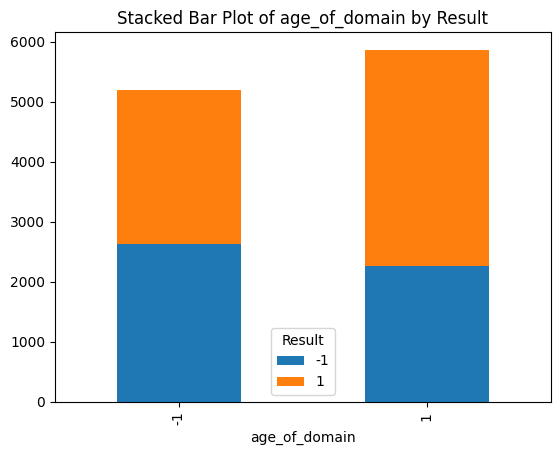

<Figure size 1000x600 with 0 Axes>

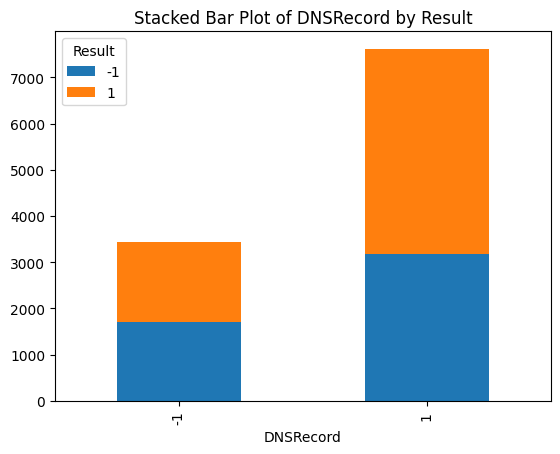

<Figure size 1000x600 with 0 Axes>

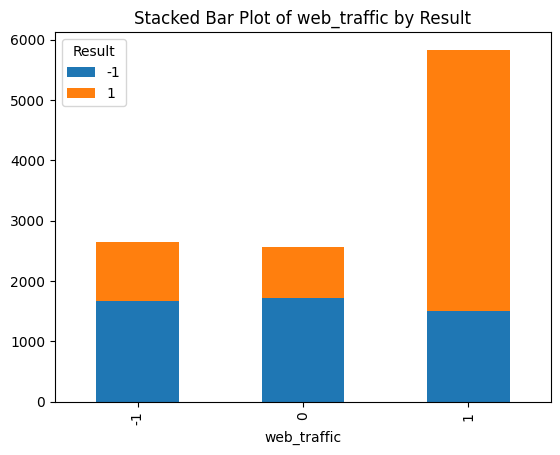

<Figure size 1000x600 with 0 Axes>

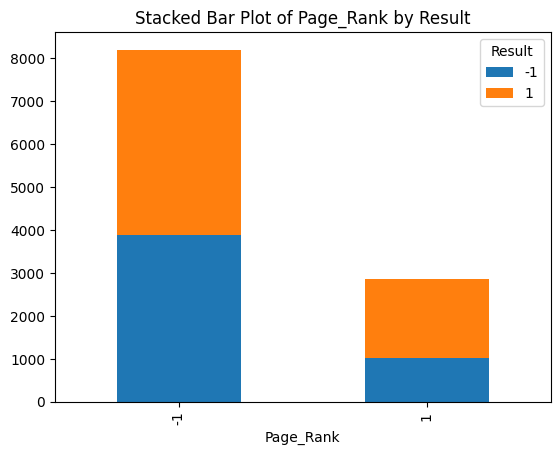

<Figure size 1000x600 with 0 Axes>

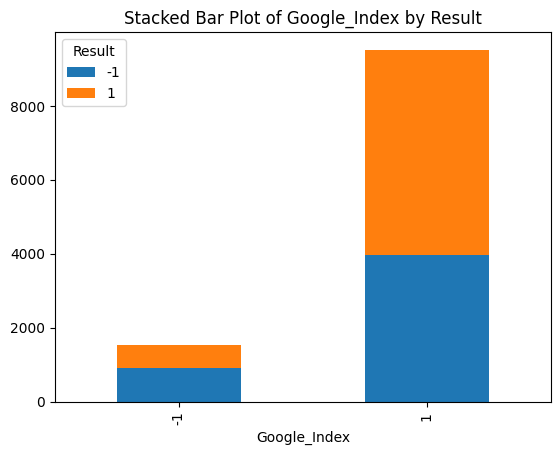

<Figure size 1000x600 with 0 Axes>

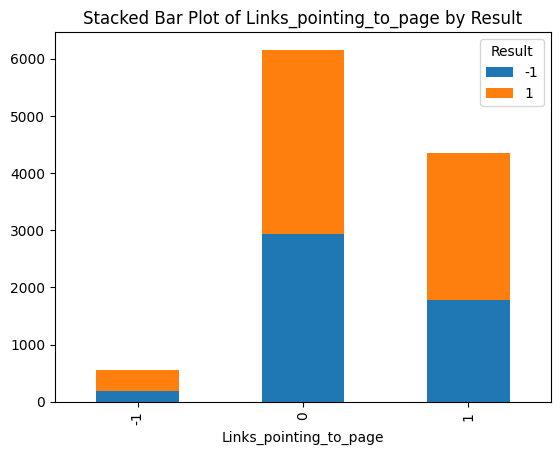

<Figure size 1000x600 with 0 Axes>

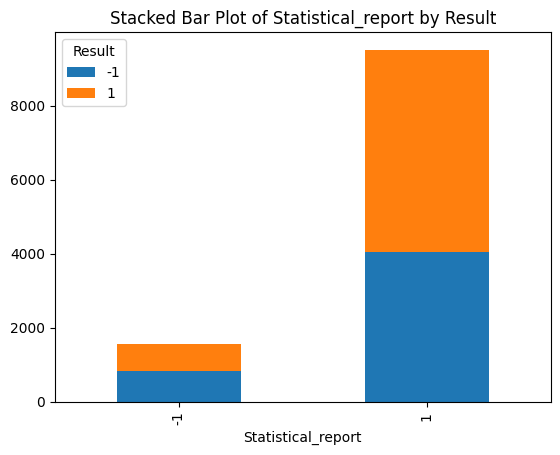

<Figure size 1000x600 with 0 Axes>

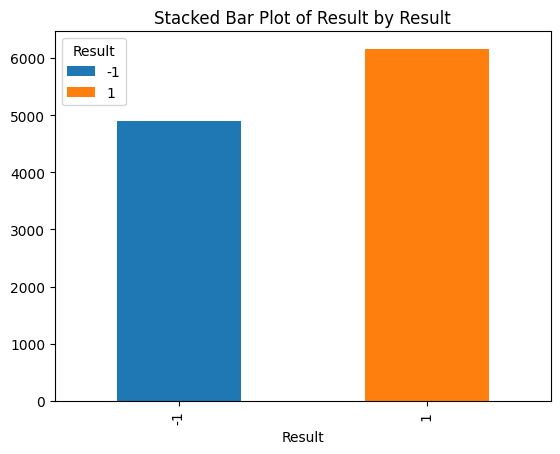

In [68]:
for column in categorical_features:
    plt.figure(figsize=(10, 6))
    pd.crosstab(df[column], df['Result']).plot(kind='bar', stacked=True)
    plt.title(f'Stacked Bar Plot of {column} by Result')
    plt.show()

In [7]:
class_distribution = df['Result'].value_counts()
print(class_distribution)

1     6157
-1    4898
Name: Result, dtype: int64


In [9]:
n = class_distribution[0] + class_distribution[1]
print('-1 class: ', (class_distribution[1] / n) * 100, '%')
print('1 class: ', (class_distribution[0] / n) * 100, '%')

-1 class:  44.30574400723655 %
1 class:  55.69425599276345 %
